In [1]:
import pandas as pd
from statsmodels.tsa import arima_model
import matplotlib.pyplot as plt

D:\Justin\anapy\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


## Read in data

In [2]:
case_path = '../../data/cases/'
ca_cases = pd.read_csv(case_path + 'CA_JHU_cases.csv')
fl_cases = pd.read_csv(case_path + 'FL_JHU_cases.csv')
ga_cases = pd.read_csv(case_path + 'GA_JHU_cases.csv')
ny_cases = pd.read_csv(case_path + 'NY_JHU_cases.csv')

In [3]:
cases = {'California': ca_cases, 
         'Florida': fl_cases, 
         'Georgia': ga_cases, 
         'NewYork': ny_cases}

## Preprocess

In [4]:
def preprocess(df, state):
    #Set date to datetime obj
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
    #start from rows where we have COVID Cases (?)
    df = df[df[state + '.JHU_ConfirmedCases.data'] > 0]
    #Given time constraints, just focus on confirmed cases
    ret_cols = ['date', state + '.JHU_ConfirmedCases.data']
    return df[ret_cols]

In [5]:
for state,df in cases.items():
    cases[state] = preprocess(df,state)
    print('{0}: {1} days available'.format(state, len(cases[state])))

California: 290 days available
Florida: 254 days available
Georgia: 259 days available
NewYork: 254 days available


### Plot cases over time

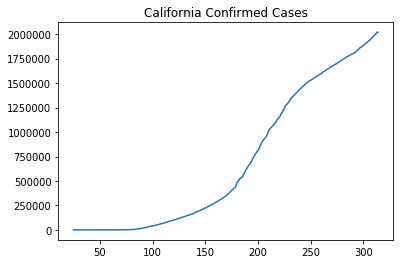

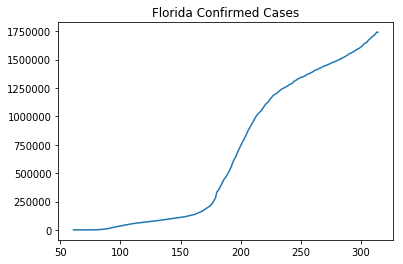

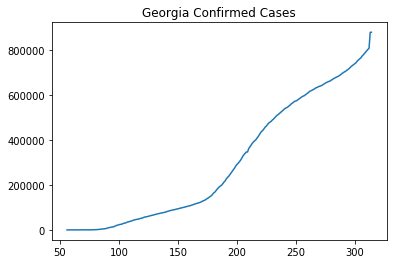

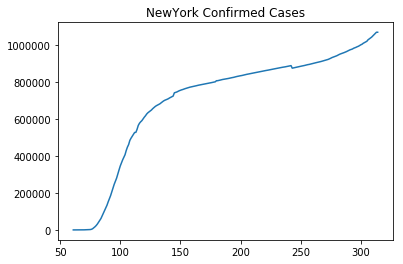

In [6]:
for state,df in cases.items():
    plt.plot(df[state+'.JHU_ConfirmedCases.data'])
    plt.title(state + ' Confirmed Cases')
    plt.show()

There's clearly an upwards trend here, so we will need to make it stationary thru differencing

### Look at autocorrelation

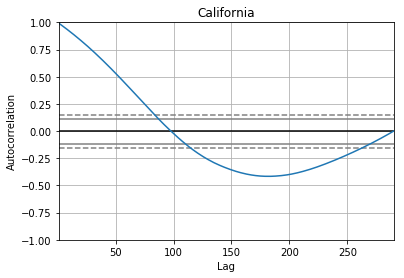

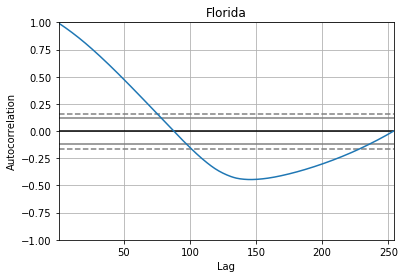

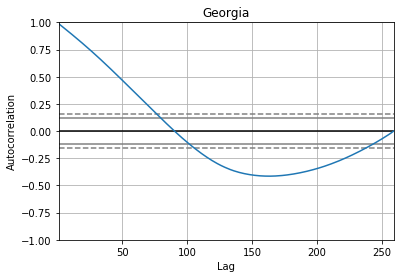

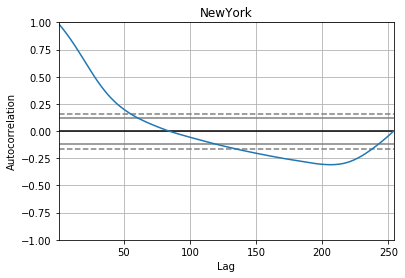

In [7]:
for state,df in cases.items():
    pd.plotting.autocorrelation_plot(df[state+'.JHU_ConfirmedCases.data'])
    plt.title(state)
    plt.show()

Correlations seems to be significant out to roughly 50-100 lags depending on the state.  Probably going to need a high order for AR term (and differencing term apparently?).

In [8]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset.iloc[i] - dataset.iloc[i - interval]
		diff.append(value)
	return pd.Series(diff)

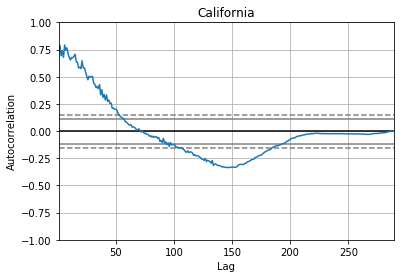

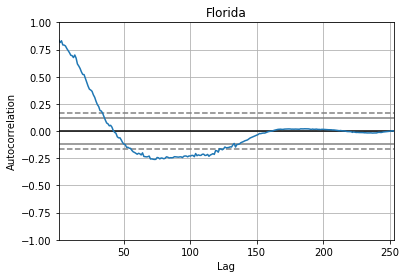

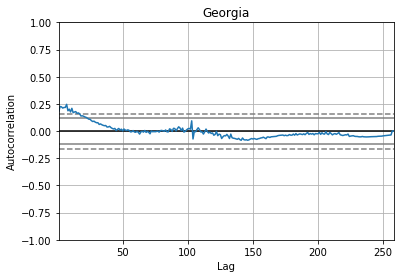

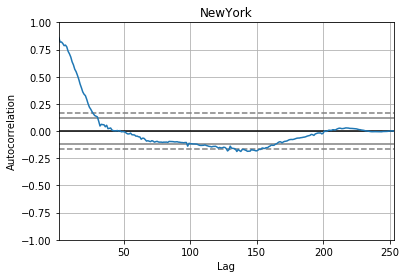

In [9]:
for state,df in cases.items():
    pd.plotting.autocorrelation_plot(difference(df[state+'.JHU_ConfirmedCases.data']))
    plt.title(state)
    plt.show()